## Imports

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

## Load Data

In [219]:
df = pd.read_csv('processed_data.csv', index_col=0)

In [220]:
df.head()

,salary_in_usd,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_size_L,company_size_M,company_size_S,company_continent_AF,company_continent_AS,company_continent_EU,company_continent_NAM,company_continent_OC,company_continent_SA
0,75000,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,60000,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,185700,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
3,165000,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
4,160000,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0


### Linear Regression

##### Train Test Split

In [221]:
X = df.drop(columns='salary_in_usd')
X.head()

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_size_L,company_size_M,company_size_S,company_continent_AF,company_continent_AS,company_continent_EU,company_continent_NAM,company_continent_OC,company_continent_SA
0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [222]:
y = df['salary_in_usd']
y.head()

0     75000
1     60000
2    185700
3    165000
4    160000
Name: salary_in_usd, dtype: int64

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

##### Model Fit and Prediction

In [224]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [225]:
y_pred_te = lin.predict(X_test)
y_pred_tr = lin.predict(X_train)

##### Visualization

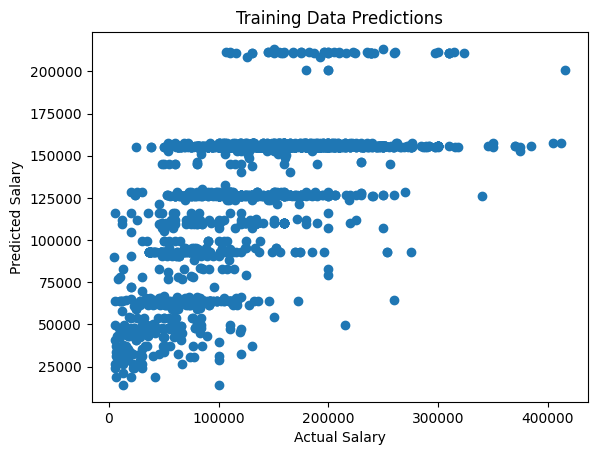

In [226]:
plt.scatter(y_train, y_pred_tr)
plt.title("Training Data Predictions")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

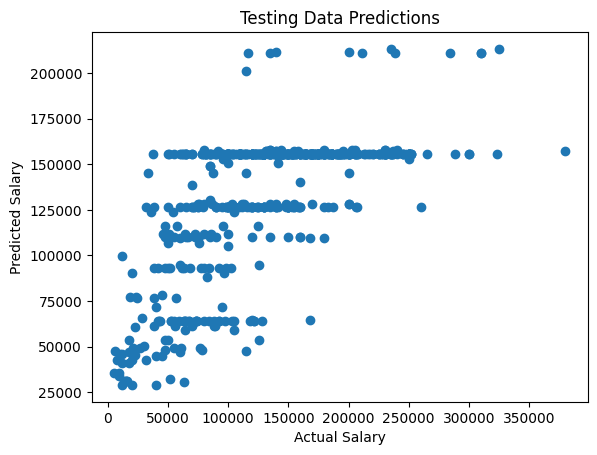

In [227]:
plt.scatter(y_test, y_pred_te)
plt.title("Testing Data Predictions")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

##### Metrics

In [228]:
print(f"Training Data R2 Score: {r2_score(y_train, y_pred_tr)}")

Training Data R2 Score: 0.3707041453065585


In [229]:
print(f"Testing Data R2 Score: {r2_score(y_test, y_pred_te)}")

Testing Data R2 Score: 0.406219402181346


In [230]:
print(f"Mean Absolute Error:{round(mean_absolute_error(y_test, y_pred_te), 2)}")

Mean Absolute Error:37769.86


The model doesn't seem to be very strong and is lumping a lot of the predictions together. Maybe we can try Ridge regression as well

##### Feature Selection

In [231]:
len(X_train.columns)

16

In [232]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)

In [233]:
hyperparams = [{'n_features_to_select':list(range(1,17))}]

In [234]:
rfe = RFE(lin)

In [235]:
model_cv = GridSearchCV(estimator=rfe,
                       param_grid=hyperparams,
                       scoring='r2',
                       verbose=1,
                       return_train_score=True)

In [236]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15,
                                                   16]}],
             return_train_score=True, scoring='r2', verbose=1)

In [237]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058603,0.011219,0.004001,0.003033,1,{'n_features_to_select': 1},0.028986,0.023148,0.098318,0.072352,...,0.052385,0.028589,16,0.030363,0.031803,0.077933,0.045163,0.042028,0.045458,0.017209
1,0.053203,0.001939,0.003001,0.000633,2,{'n_features_to_select': 2},0.203271,0.205955,0.194161,0.067501,...,0.142908,0.071810,15,0.208729,0.208151,0.204040,0.060621,0.067893,0.149887,0.069973
2,0.048803,0.003657,0.003001,0.000633,3,{'n_features_to_select': 3},0.219243,0.211773,0.219004,0.067980,...,0.152313,0.079248,14,0.216685,0.218575,0.216721,0.060608,0.067891,0.156096,0.075031
3,0.044404,0.002801,0.002999,0.000632,4,{'n_features_to_select': 4},0.219568,0.211217,0.219052,0.110672,...,0.161403,0.070658,13,0.216566,0.218462,0.216720,0.112280,0.069506,0.166707,0.063366
4,0.045203,0.002482,0.002801,0.000749,5,{'n_features_to_select': 5},0.231113,0.220707,0.233713,0.239716,...,0.200857,0.061219,12,0.229795,0.221131,0.229759,0.212778,0.095781,0.197849,0.051423
5,0.042605,0.002417,0.003599,0.001358,6,{'n_features_to_select': 6},0.236653,0.220575,0.236230,0.235002,...,0.200936,0.062645,11,0.234757,0.242151,0.235152,0.234821,0.095885,0.208553,0.056404
6,0.034003,0.002001,0.003200,0.000400,7,{'n_features_to_select': 7},0.236753,0.217681,0.237124,0.236797,...,0.205373,0.053947,10,0.234673,0.241809,0.235033,0.234420,0.140735,0.217334,0.038399
7,0.034403,0.002057,0.003600,0.000489,8,{'n_features_to_select': 8},0.343328,0.351184,0.256633,0.249034,...,0.282495,0.055019,9,0.370329,0.367102,0.260786,0.248106,0.235559,0.296376,0.059609
8,0.031403,0.001855,0.003600,0.000489,9,{'n_features_to_select': 9},0.339047,0.352796,0.261342,0.249860,...,0.289160,0.046926,8,0.370568,0.367743,0.267476,0.248455,0.250525,0.300953,0.056084
9,0.030602,0.001357,0.003000,0.000632,10,{'n_features_to_select': 10},0.348492,0.350452,0.365007,0.250517,...,0.311151,0.053661,7,0.373982,0.371576,0.362354,0.248309,0.250180,0.321280,0.058948


The RFE is recommending to keep all the features, as this produces the highest scores.

### Ridge Regression

##### Model Fit and Prediction

In [238]:
ridge = Ridge(alpha=0.0)

In [239]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.0)

In [240]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

##### Visualization

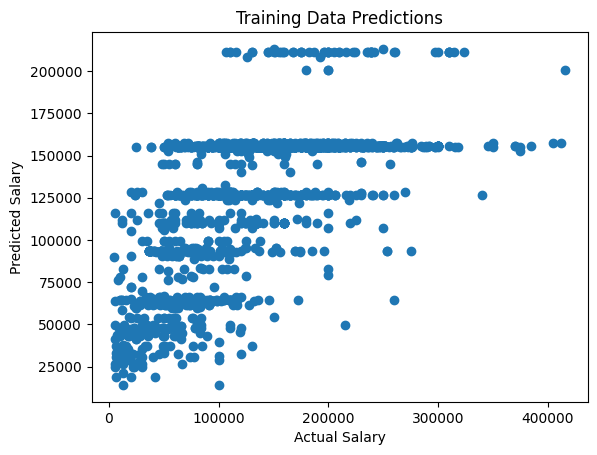

In [241]:
plt.scatter(y_train, y_pred_train)
plt.title("Training Data Predictions")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

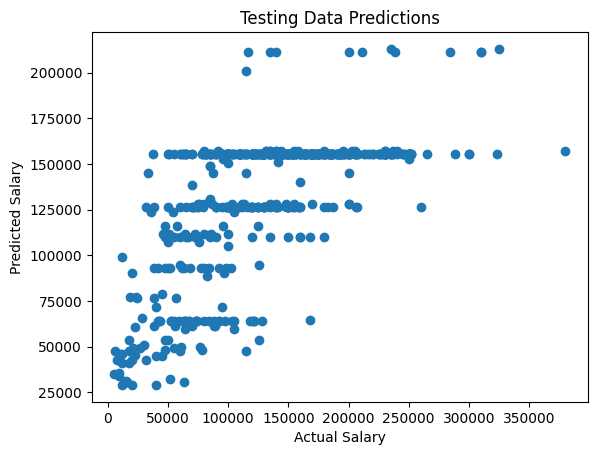

In [242]:
plt.scatter(y_test, y_pred_test)
plt.title("Testing Data Predictions")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

##### Metrics

In [243]:
print(f"Training Data R2 Score: {r2_score(y_train, y_pred_train)}")

Training Data R2 Score: 0.3707203336779752


In [244]:
print(f"Testing Data R2 Score: {r2_score(y_test, y_pred_test)}")

Testing Data R2 Score: 0.4062200360687859


In [245]:
print(f"Mean Absolute Error:{round(mean_absolute_error(y_test, y_pred), 2)}")

ValueError: Found input variables with inconsistent numbers of samples: [607, 759]

Although the metrics have improved slightly, the model is still very weak.

##### Alpha Selection

In [ ]:
hyperparams = [{'alpha':np.linspace(0, 1.0, 11)}]
hyperparams

In [ ]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cv = GridSearchCV(estimator=ridge,
                       param_grid=hyperparams,
                       scoring='neg_mean_absolute_error',
                       verbose=1)

In [ ]:
cv.fit(X_train, y_train)

In [246]:
cv_results = pd.DataFrame(cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007800,0.000979,0.003001,6.332399e-04,0.0,{'alpha': 0.0},-38735.372428,-38199.740741,-36572.160825,-40207.039175,-38871.767010,-38517.216036,1175.825768,1
1,0.005801,0.000749,0.003200,3.998042e-04,0.1,{'alpha': 0.1},-38612.572871,-38202.784951,-36740.967554,-40248.300378,-38840.807242,-38529.086599,1128.155860,11
2,0.005400,0.000798,0.002999,7.776979e-07,0.2,{'alpha': 0.2},-38610.650312,-38203.053237,-36738.370322,-40247.227067,-38842.458997,-38528.351987,1128.700262,10
3,0.004401,0.000489,0.003400,4.907985e-04,0.3,{'alpha': 0.30000000000000004},-38608.729962,-38203.325322,-36735.836774,-40246.148804,-38844.102317,-38527.628636,1129.224096,9
4,0.005601,0.000490,0.003000,6.330171e-04,0.4,{'alpha': 0.4},-38606.811788,-38203.601051,-36733.364656,-40245.065876,-38845.737349,-38526.916144,1129.728142,8
5,0.005803,0.000402,0.002999,2.008385e-06,0.5,{'alpha': 0.5},-38604.895758,-38203.880275,-36730.951824,-40243.978557,-38847.364234,-38526.214130,1130.213137,7
6,0.005202,0.000399,0.002798,3.996673e-04,0.6,{'alpha': 0.6000000000000001},-38602.981848,-38204.162851,-36728.596241,-40242.887110,-38848.983106,-38525.522231,1130.679788,6
7,0.005399,0.000489,0.002801,4.005197e-04,0.7,{'alpha': 0.7000000000000001},-38601.070035,-38204.448644,-36726.295965,-40241.791783,-38850.594098,-38524.840105,1131.128768,5
8,0.005801,0.000978,0.003000,1.584363e-06,0.8,{'alpha': 0.8},-38599.160299,-38204.737523,-36724.049144,-40240.692818,-38852.197336,-38524.167424,1131.560716,4
9,0.005000,0.001095,0.002600,4.918109e-04,0.9,{'alpha': 0.9},-38597.252627,-38205.029360,-36721.854014,-40239.590444,-38853.792945,-38523.503878,1131.976245,3


### Random Forest Classifier

##### Train Test Split

In [247]:
y = np.array(y)
print(y)
X.head()

[ 75000  60000 185700 ... 105000 100000  94665]


,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_size_L,company_size_M,company_size_S,company_continent_AF,company_continent_AS,company_continent_EU,company_continent_NAM,company_continent_OC,company_continent_SA
0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0


In [248]:
feature_list = list(X.columns)
X = np.array(X)

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [250]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2275, 16) (759, 16) (2275,) (759,)


##### Model Fit and Prediction

In [251]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [252]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [253]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

##### Visualization

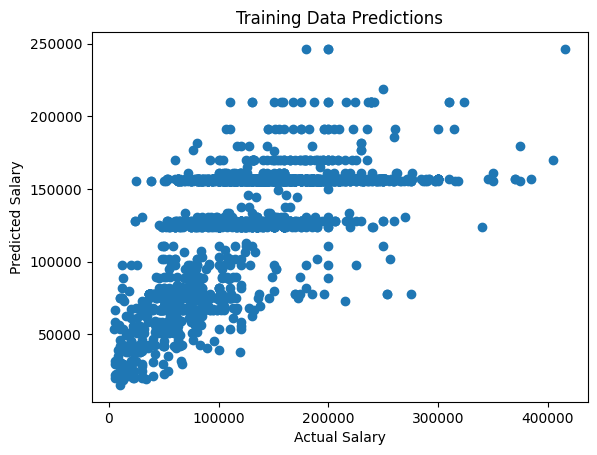

In [254]:
plt.scatter(y_train, y_pred_train)
plt.title("Training Data Predictions")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

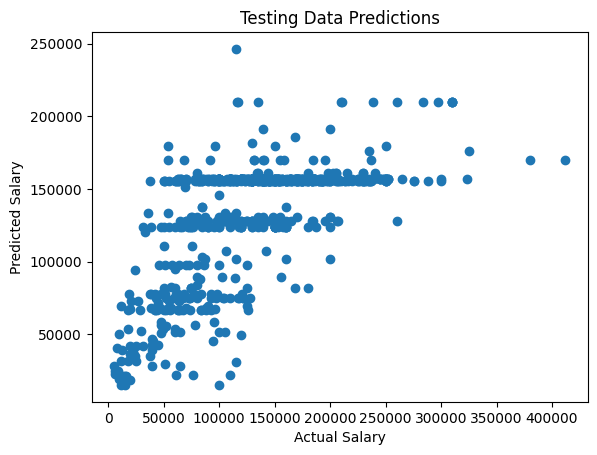

In [255]:
plt.scatter(y_test, y_pred_test)
plt.title("Testing Data Predictions")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

##### Metrics

In [211]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Mean Absolute Error: 37799.37598630223


In [213]:
r2_score(y_train, y_pred_train)

0.40777090746378397

In [214]:
r2_score(y_test, y_pred_test)

0.3980879948482424

##### Feature Selection

In [232]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: company_continent_NAM Importance: 0.65
Variable: experience_level_EX  Importance: 0.09
Variable: experience_level_SE  Importance: 0.08
Variable: experience_level_EN  Importance: 0.03
Variable: experience_level_MI  Importance: 0.03
Variable: company_size_S       Importance: 0.03
Variable: remote_ratio_0       Importance: 0.02
Variable: remote_ratio_50      Importance: 0.01
Variable: remote_ratio_100     Importance: 0.01
Variable: company_size_L       Importance: 0.01
Variable: company_size_M       Importance: 0.01
Variable: company_continent_AS Importance: 0.01
Variable: company_continent_EU Importance: 0.01
Variable: company_continent_AF Importance: 0.0
Variable: company_continent_OC Importance: 0.0
Variable: company_continent_SA Importance: 0.0


None of the models seem to be very accurate, being off by about $37,000 on average in their predictions. 